# Example of loading data from a file and plotting values

In the first cell of the jupyter notebook, we will include Python libraries for plotting. We are going to use matplotlib.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set larger font size
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

### Loading data from a file

The plant monitor measurements for each device are stored in separate files on the server under `/data/measurements`. The filenames correspond to the device MAC addresses and have `.csv` extension. This stands for comma-separated-value which indicates that each measurement, corresponding to a single row in the file, is represented as values separated by commas.

You can list the individual files in the directory in the following way.

In [2]:
import os

files = os.listdir("/data/measurements")

# Print the files on one line each.
print('\n'.join(files))

C47C8D65CB0F.csv
C47C8D65BD76.csv


We will load data from one of the files into a Pandas dataframe, giving each column in the file appropriate name. 

In [3]:
import pandas as pd

df = pd.read_csv('/data/measurements/C47C8D65CB0F.csv',
                 names=['time', 'moisture', 'temperature', 'conductivity', 'light'])
print(df.to_string())

                           time  moisture  temperature  conductivity  light
0    2018-01-31 20:10:06.394177         0         20.9             0     53
1    2018-02-01 14:36:58.079419         8         19.5            63   1866
2    2018-02-01 15:33:05.796115         8         19.1            63    271
3    2018-02-01 16:30:14.797963         8         20.0            58     71
4    2018-02-01 17:30:13.672170         8         19.3            59     53
5    2018-02-01 18:30:15.597362         8         19.0            58     53
6    2018-02-01 19:30:15.499216         8         18.9            58     35
7    2018-02-01 20:30:13.547148         8         18.9            55     35
8    2018-02-01 21:30:13.431691         8         18.9            55     35
9    2018-02-01 22:30:13.443831         8         18.9            55     16
10   2018-02-01 23:30:13.407384         8         18.6            55     32
11   2018-02-02 00:30:14.418258         8         18.5            56     14
12   2018-02

### Basic plotting

Let us plot for example the moisture as a function of time. The first step is to extract the values from the dataframe into variables `x` and `y`. Plotting time is always tricky because of multiple formats and time zones. The code below shows how to transform the time values from the dataframe, represented as text, into something that the plotting library can interpret.

In [4]:
from datetime import datetime

x = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in df['time']]
y = df['moisture']

The actual plot can be created in a single line. However, the such plot does not have any text indicating what is plotted and the time labels are overlapping.

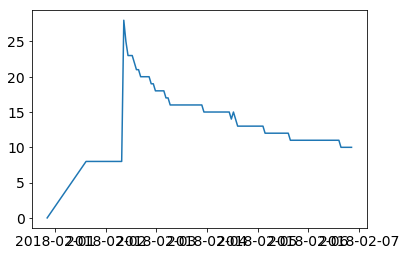

In [5]:
plt.plot(x, y, label='C47C8D65CB0F');

### Improving style

The style of the plot can be improved with a few additinoal lines of code.

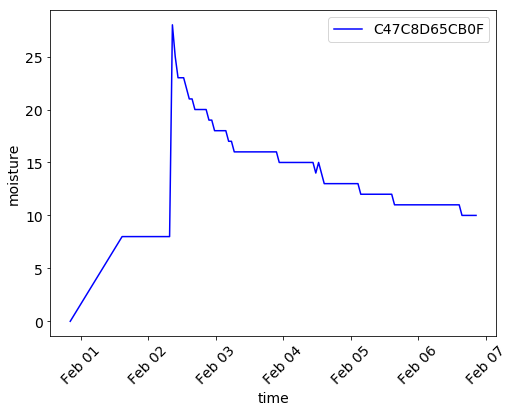

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

# 'b-' stands for blue line
ax.plot(x, y, 'b-', label='C47C8D65CB0F')

# Show legend
ax.legend()

# Rotate the time axis labels and show them as month and day
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Show axis labels
plt.xlabel('time')
plt.ylabel('moisture');

### Selecting data

Maybe you want to remove some data points from the plots. For example, you did some testing before the real measurement started and wish to select only data after a certain date.

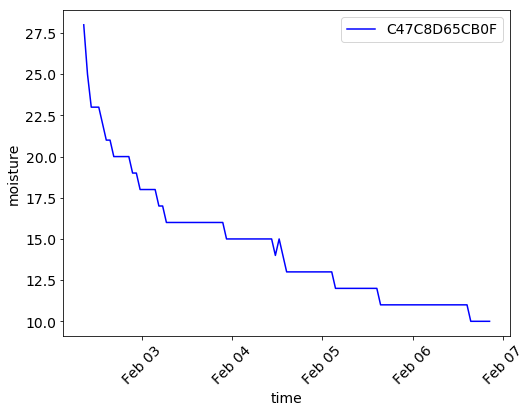

In [7]:
# Select data
df_sel = df[df['time'] > '2018-02-02 08:30:00']

# The remainig lines are the same as above
x = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in df_sel['time']]
y = df_sel['moisture']

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'b-', label='C47C8D65CB0F')
ax.legend()
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xlabel('time')
plt.ylabel('moisture');